In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/World University Rankings.csv')
df

,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,closed,unaccredited,overall_score
0,University of Oxford,96.6,100.0,99.0,98.7,97.5,master_account,0,United Kingdom,"21,750",10.9,42%,49:51:00,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,98.5
1,Stanford University,99.0,97.8,99.6,100.0,87.0,private,0,United States,"14,517",6.4,23%,47:53:00,"Computer Science,Communication & Media Studies...",False,False,98
2,Massachusetts Institute of Technology,98.6,96.2,99.7,100.0,93.8,private,0,United States,"11,085",8.0,33%,41:59:00,"Architecture,Economics & Econometrics,Archaeol...",False,False,97.9
3,Harvard University,97.7,99.9,99.4,84.2,90.8,private,0,United States,"20,050",9.0,25%,51:49:00,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,97.8
4,University of Cambridge,95.8,100.0,98.0,87.9,97.4,master_account,0,United Kingdom,"20,565",11.5,38%,48:52:00,Politics & International Studies (incl Develop...,False,False,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,Zarqa University,NaN,NaN,NaN,NaN,NaN,master_account,0,Jordan,"5,881",17.0,35%,60:40:00,"General Engineering,Civil Engineering,Electric...",False,False,NaN
2669,Zhetysu University,NaN,NaN,NaN,NaN,NaN,master_account,0,Kazakhstan,"4,872",18.2,0%,66:34:00,"History, Philosophy & Theology,Psychology,Lang...",False,False,NaN
2670,Zhytomyr Polytechnic State University,NaN,NaN,NaN,NaN,NaN,master_account,0,Ukraine,"4,454",16.1,1%,40 : 60,"Law,Economics & Econometrics,Politics & Intern...",False,False,NaN
2671,Ziane Achour University of Djelfa,NaN,NaN,NaN,NaN,NaN,master_account,0,Algeria,"31,103",28.5,0%,55:45:00,"Architecture,Agriculture & Forestry,Biological...",False,False,NaN


In [4]:
df['record_type'] = df['record_type'].map({'master_account': 0, 'private': 1, 'public': 2})
df

,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,closed,unaccredited,overall_score
0,University of Oxford,96.6,100.0,99.0,98.7,97.5,0,0,United Kingdom,"21,750",10.9,42%,49:51:00,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,98.5
1,Stanford University,99.0,97.8,99.6,100.0,87.0,1,0,United States,"14,517",6.4,23%,47:53:00,"Computer Science,Communication & Media Studies...",False,False,98
2,Massachusetts Institute of Technology,98.6,96.2,99.7,100.0,93.8,1,0,United States,"11,085",8.0,33%,41:59:00,"Architecture,Economics & Econometrics,Archaeol...",False,False,97.9
3,Harvard University,97.7,99.9,99.4,84.2,90.8,1,0,United States,"20,050",9.0,25%,51:49:00,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,97.8
4,University of Cambridge,95.8,100.0,98.0,87.9,97.4,0,0,United Kingdom,"20,565",11.5,38%,48:52:00,Politics & International Studies (incl Develop...,False,False,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,Zarqa University,NaN,NaN,NaN,NaN,NaN,0,0,Jordan,"5,881",17.0,35%,60:40:00,"General Engineering,Civil Engineering,Electric...",False,False,NaN
2669,Zhetysu University,NaN,NaN,NaN,NaN,NaN,0,0,Kazakhstan,"4,872",18.2,0%,66:34:00,"History, Philosophy & Theology,Psychology,Lang...",False,False,NaN
2670,Zhytomyr Polytechnic State University,NaN,NaN,NaN,NaN,NaN,0,0,Ukraine,"4,454",16.1,1%,40 : 60,"Law,Economics & Econometrics,Politics & Intern...",False,False,NaN
2671,Ziane Achour University of Djelfa,NaN,NaN,NaN,NaN,NaN,0,0,Algeria,"31,103",28.5,0%,55:45:00,"Architecture,Agriculture & Forestry,Biological...",False,False,NaN


In [5]:
df_new= df.select_dtypes(include=['number'])
df_new

,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,stats_student_staff_ratio
0,96.6,100.0,99.0,98.7,97.5,0,0,10.9
1,99.0,97.8,99.6,100.0,87.0,1,0,6.4
2,98.6,96.2,99.7,100.0,93.8,1,0,8.0
3,97.7,99.9,99.4,84.2,90.8,1,0,9.0
4,95.8,100.0,98.0,87.9,97.4,0,0,11.5
...,...,...,...,...,...,...,...,...
2668,NaN,NaN,NaN,NaN,NaN,0,0,17.0
2669,NaN,NaN,NaN,NaN,NaN,0,0,18.2
2670,NaN,NaN,NaN,NaN,NaN,0,0,16.1
2671,NaN,NaN,NaN,NaN,NaN,0,0,28.5


In [6]:
df_new.dropna()

,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,stats_student_staff_ratio
0,96.6,100.0,99.0,98.7,97.5,0,0,10.9
1,99.0,97.8,99.6,100.0,87.0,1,0,6.4
2,98.6,96.2,99.7,100.0,93.8,1,0,8.0
3,97.7,99.9,99.4,84.2,90.8,1,0,9.0
4,95.8,100.0,98.0,87.9,97.4,0,0,11.5
...,...,...,...,...,...,...,...,...
1899,19.5,11.7,34.5,36.0,20.4,0,0,13.4
1900,22.0,12.4,17.6,59.3,38.8,0,0,27.5
1901,23.9,8.6,26.8,16.4,38.1,0,0,8.0
1902,16.9,10.5,28.8,23.1,30.6,0,0,16.3


In [7]:
df=df_new.dropna()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 0 to 1903
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   scores_teaching               1904 non-null   float64
 1   scores_research               1904 non-null   float64
 2   scores_citations              1904 non-null   float64
 3   scores_industry_income        1904 non-null   float64
 4   scores_international_outlook  1904 non-null   float64
 5   record_type                   1904 non-null   int64  
 6   member_level                  1904 non-null   int64  
 7   stats_student_staff_ratio     1904 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 133.9 KB


In [9]:
df.describe()

,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,stats_student_staff_ratio
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,29.060662,23.416176,52.189706,47.057405,49.907143,0.139706,0.684349,18.671008
std,13.967201,16.697923,25.071342,26.150454,21.828249,0.479116,2.463746,11.072058
min,9.400000,4.600000,3.400000,15.600000,16.100000,0.000000,0.000000,0.300000
25%,19.400000,11.800000,30.400000,22.275000,31.975000,0.000000,0.000000,12.300000
50%,25.800000,17.250000,52.400000,41.050000,45.300000,0.000000,0.000000,16.300000
75%,34.500000,29.900000,73.225000,68.200000,65.400000,0.000000,0.000000,22.025000
max,99.000000,100.000000,99.700000,100.000000,98.800000,2.000000,11.000000,199.900000


In [13]:
x=df[['scores_research','scores_citations','scores_industry_income','scores_international_outlook','stats_student_staff_ratio']]
y=df['scores_teaching']

In [14]:
x

,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_student_staff_ratio
0,100.0,99.0,98.7,97.5,10.9
1,97.8,99.6,100.0,87.0,6.4
2,96.2,99.7,100.0,93.8,8.0
3,99.9,99.4,84.2,90.8,9.0
4,100.0,98.0,87.9,97.4,11.5
...,...,...,...,...,...
1899,11.7,34.5,36.0,20.4,13.4
1900,12.4,17.6,59.3,38.8,27.5
1901,8.6,26.8,16.4,38.1,8.0
1902,10.5,28.8,23.1,30.6,16.3


In [15]:
x.shape

(1904, 5)

In [16]:
y

,scores_teaching
0,96.6
1,99.0
2,98.6
3,97.7
4,95.8
...,...
1899,19.5
1900,22.0
1901,23.9
1902,16.9


In [17]:
y.shape

(1904,)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, random_state=42, test_size = 0.3)

In [19]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = reg.predict(x_test)

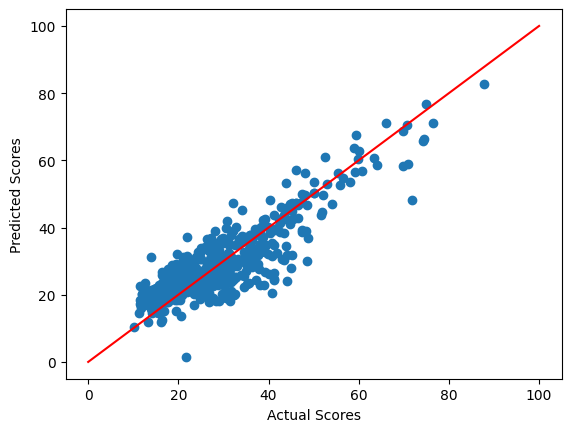

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Scores')
vv = [0,10,20,30,40,50,60,70,80,90,100] # reference line to show how these two amounts ( test and predicted) are different  )
plt.plot(vv,vv, color='red')
plt.ylabel('Predicted Scores')
plt.show()

In [22]:
import sklearn
sklearn.metrics.r2_score(y_test, y_pred)

0.7667167251703134